# Анализ игровой индустрии
Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Описание данных  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг   компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from scipy import stats as st
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
games = pd.read_csv('/datasets/games.csv')
#games = pd.read_csv('games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Мы загрузили данные по компьютерным играм.  
Обнаружены пропуски в данных у параметров: Название (всего 2 пропуска), Год выпуска, Жанр (всего 2 пропуска), Оценка критиков, Оценка пользователей, Рейтинг.   
Необходимо изменить тип данных показателя Оценка пользователей и Год выпуска на Int.
Необходимо изменить названия столбцов (привести к нижнему регистру). 

### Шаг 2. Подготовим данные.

Преобразуем названия столбцов (приведем к нижнему регистру). 

In [4]:
games.columns = games.columns.str.lower()

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изменим тип данных показателя Оценка пользователей на Int. Для этого нужно заполнить пропуски какими-то значениями. Чтобы не путать с реальной оценкой пользователей, заменим отсутствующие значения на -1. 

In [6]:
games['user_score'] = games['user_score'].fillna('-1')

In [7]:
games['user_score'].value_counts()

-1     6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
0.5       2
0.9       2
1.3       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

Мы видим, что большое кол-во оценок пользователей указывается как tbd(возможно to be discussed). Предлагаю их также заменить на -1.

In [8]:
games['user_score'] = games['user_score'].replace('tbd', '-1')

In [9]:
games['user_score'] = games['user_score'].astype('float')

Проверим данные на дубликаты.

In [10]:
games.duplicated().sum()

0

Посчитаем суммарные продажи во всех регионах и добавим отдельный столбец в таблицу. 

In [11]:
games['total_regions_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [12]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_regions_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN,31.38


# Шаг 3. Проведем исследовательский анализ данных.

Посмотрим, сколько игр выпускалось в разные годы. 

In [13]:
games.groupby('year_of_release')['name'].agg('count').sort_values()

year_of_release
1980.0       9
1984.0      14
1985.0      14
1988.0      15
1990.0      16
1987.0      16
1989.0      17
1983.0      17
1986.0      21
1982.0      36
1991.0      41
1992.0      43
1981.0      46
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1999.0     338
2000.0     350
1998.0     379
2001.0     482
2016.0     502
2013.0     544
2014.0     581
2015.0     606
2012.0     653
2004.0     762
2003.0     775
2002.0     829
2005.0     939
2006.0    1006
2011.0    1136
2007.0    1197
2010.0    1255
2009.0    1426
2008.0    1427
Name: name, dtype: int64

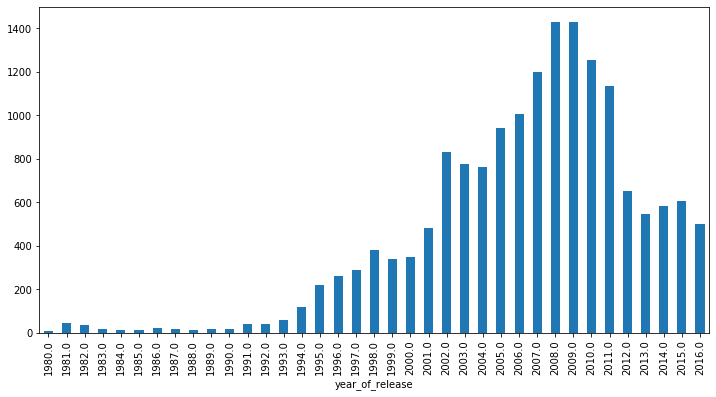

In [14]:
games.groupby('year_of_release')['name'].agg('count').plot(kind='bar', figsize = (12,6))


Максимальное кол-во игр выпускалось в период с 2008 по 2010 гг. Минимальные кол-ва игр выпускались в период с 1980 по 1990 гг.

Посмотрим, как менялись продажи по платформам.

In [15]:
games.groupby('platform')['total_regions_sales'].agg('sum').sort_values(ascending=False).head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_regions_sales, dtype: float64

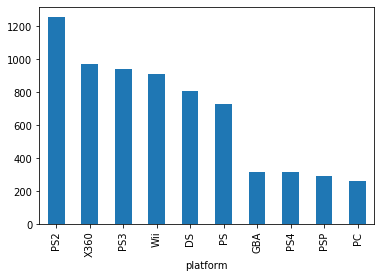

In [16]:
games.groupby('platform')['total_regions_sales'].agg('sum').sort_values(ascending=False).head(10).plot(kind='bar')

In [17]:
top_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

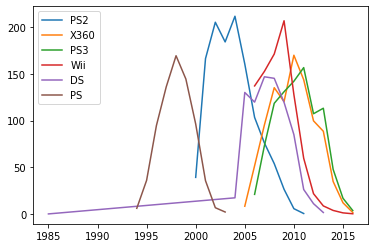

In [18]:
for x in top_platform:
    plt.plot(games[games['platform']==x].groupby('year_of_release').agg({'total_regions_sales':'sum'}), label=x)
    plt.legend()

В среднем каждая платформа продавалась около 10 лет. 

In [19]:
games[games.platform.isin(top_platform)].groupby('platform')['year_of_release'].agg(['min', 'max'])

,min,max
platform,,
DS,1985.0,2013.0
PS,1994.0,2003.0
PS2,2000.0,2011.0
PS3,2006.0,2016.0
Wii,2006.0,2016.0
X360,2005.0,2016.0


In [20]:
# Код ревьюера
temp = games[games.platform.isin(top_platform)].groupby('platform')['year_of_release'].agg(['min', 'max'])
temp['delta'] = temp['max'] - temp['min']
temp

,min,max,delta
platform,,,
DS,1985.0,2013.0,28.0
PS,1994.0,2003.0,9.0
PS2,2000.0,2011.0,11.0
PS3,2006.0,2016.0,10.0
Wii,2006.0,2016.0,10.0
X360,2005.0,2016.0,11.0


Нам необходимо определить Актуальный период. Он явно не должен быть больше среднего времени жизни платформы. На мой взгляд актуальным является период с 2010 по 2014 год. Это период, когда вышли все популярные консоли и представлены данные по всем популярным консолям. 

In [21]:
games_new = games.query('2009<year_of_release<2015')

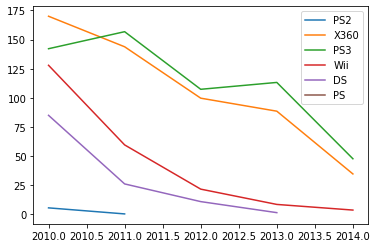

In [22]:
for x in top_platform:
    plt.plot(games_new[games_new['platform']==x].groupby('year_of_release').agg({'total_regions_sales':'sum'}), label=x)
    plt.legend()


Посмотрим продажи по всем платформам за Актуальный период.

In [23]:
games_new.groupby('platform')['total_regions_sales'].agg('sum').sort_values()

platform
PS2       6.09
PSV      43.31
WiiU     61.24
PSP      63.93
XOne     73.03
PC      108.19
DS      123.75
PS4     125.99
3DS     214.89
Wii     221.65
X360    536.93
PS3     567.32
Name: total_regions_sales, dtype: float64

In [24]:
new_platform = ['PS3', 'X360', 'Wii', '3DS', 'PS4', 'DS', 'PC', 'XOne', 'PSP', 'WiiU']

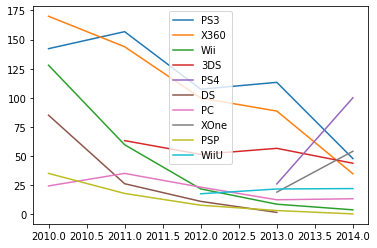

In [25]:
for x in new_platform:
    plt.plot(games_new[games_new['platform']==x].groupby('year_of_release').agg({'total_regions_sales':'sum'}), label=x)
    plt.legend()

На конец 2014 г по кол-ву продаж лидируют платформы, которые вышли в 2013 году: PS4, XOne. Эти платформы можно назвать перспективными.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Text(0.5, 0.98, '')

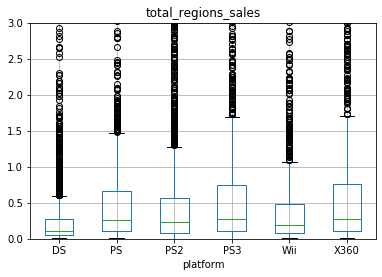

In [26]:

plot = games[games.platform.isin(top_platform)].boxplot('total_regions_sales', by='platform').set_ylim(0,3)
plt.suptitle('')

Медиана по топовым платформам находится в диапазоне от 0,2 до 0,25 млн  продаж за игру. Верхняя граница предела, за которыми определяются аномалии, у двух платформ: PS3 и "X360" на уровне 1,7 млн. У остальных до 1,5 млн. Среди всех выделяется платформа DS: медиана около 0,1 млн, верхняя граница 0,6 млн. 
Данную разницу можно объяснить популярностью платформ (у платформы DS продажи были ниже уровня других платформ). Тогда как популярность платформ PS3 и "X360" сохранялась продолжительное время, что влияло на объемы продаж. 


Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Для анализа возьмем платформу PS3. Она давно на рынке и до сих пор продается. 

Построем диаграмму рассеяния между отзывами пользователей и продажами.

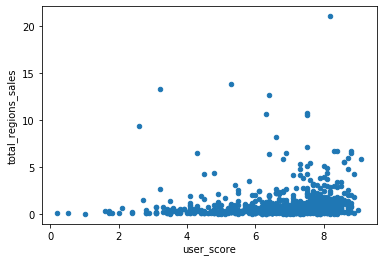

In [27]:
list_user = games[(games['platform'] == 'PS3') & (games['user_score']>0)]
list_user.plot(kind='scatter', x='user_score', y='total_regions_sales')

С ростом рейтинга пользователей увеличиваются продажи игр. Однако есть выбросы, то есть случаи, когда рейтинги невысокие, а продажи высокие. 

Построем диаграмму рассеяния между рейтингом критиков и продажами. 

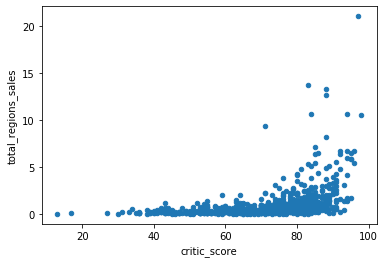

In [28]:
list_critics = games[(games['platform'] == 'PS3') & (games['critic_score']>0)]
list_critics.plot(kind='scatter', x='critic_score', y='total_regions_sales')

Прослеживается прямая зависимость между рейтингом критиков и ростом продаж. 

Построим корреляцию между отзывами и продажами. 

In [29]:
corr_matrix = games[games['platform'] == 'PS3'][['user_score', 'critic_score', 'total_regions_sales']].corr()
print(corr_matrix)

                     user_score  critic_score  total_regions_sales
user_score             1.000000      0.535184             0.272669
critic_score           0.535184      1.000000             0.432432
total_regions_sales    0.272669      0.432432             1.000000


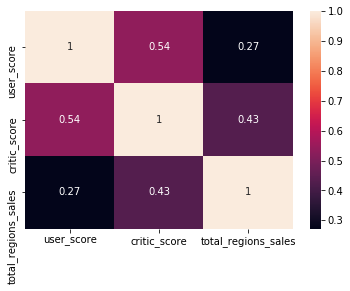

In [30]:
sns.heatmap(corr_matrix, annot=True)

Сильнее на конечные продажи влияют оценки критиков (корреляция 0,43). Влияние оценок пользователей на продажи меньше (корреляция 0,27).

Посмотрим корреляцию этих же признаков на других топовых платформах. 

In [31]:
for x in top_platform:
    corr_matrix = games[games['platform'] == x][['user_score', 'critic_score', 'total_regions_sales']].corr()
    print(x, corr_matrix)
    

PS2                      user_score  critic_score  total_regions_sales
user_score             1.000000      0.383133             0.259366
critic_score           0.383133      1.000000             0.395435
total_regions_sales    0.259366      0.395435             1.000000
X360                      user_score  critic_score  total_regions_sales
user_score             1.000000      0.510099             0.207274
critic_score           0.510099      1.000000             0.393736
total_regions_sales    0.207274      0.393736             1.000000
PS3                      user_score  critic_score  total_regions_sales
user_score             1.000000      0.535184             0.272669
critic_score           0.535184      1.000000             0.432432
total_regions_sales    0.272669      0.432432             1.000000
Wii                      user_score  critic_score  total_regions_sales
user_score             1.000000      0.483488             0.183879
critic_score           0.483488      1.000000

Во всех платформах, кроме Wii, прослеживается большая корреляция у продаж с оценкой критиков, чем с оценкой пользователей. Уровни корреляции похожи, за исключением Wii и DS. У них корреляция рейтингов критиков и пользователей  с продажами сильно ниже. 

Посмотрим на общее распределение игр по жанрам. 

In [32]:
games.groupby('genre')['total_regions_sales'].agg('sum').sort_values()

genre
Strategy         174.23
Adventure        237.59
Puzzle           242.57
Simulation       389.97
Fighting         447.53
Racing           728.67
Misc             802.51
Platform         827.77
Role-Playing     934.56
Shooter         1052.45
Sports          1331.27
Action          1744.17
Name: total_regions_sales, dtype: float64

Максимальные продажи игр жанра Action. Минимальные продажи жанра Strategy. Не могу определить, какие жанры прибыльные, так как представлены данные толко по продажам игр в копиях. 

# Шаг 4. Составим портрет пользователей каждого региона. 

Определим для пользователя каждого региона самые популярные платформы.

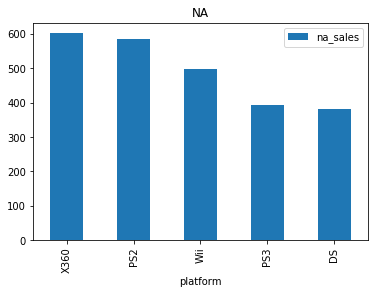

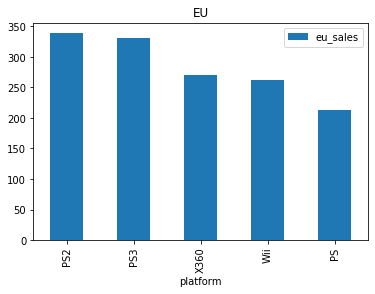

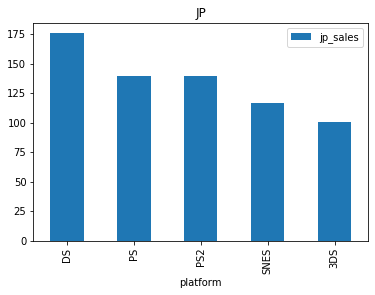

In [33]:
games.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', title='NA')
games.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', title='EU')
games.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', title='JP')



Популярность платформ абсолютно разная в зависимости от региона.

Определим для пользователей каждого региона самые популярные жанры. 

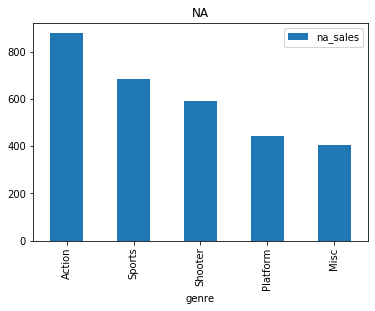

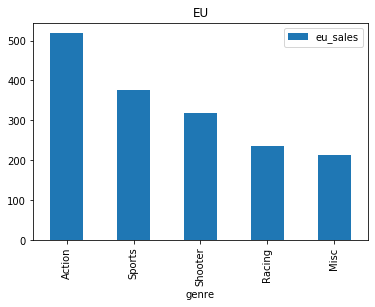

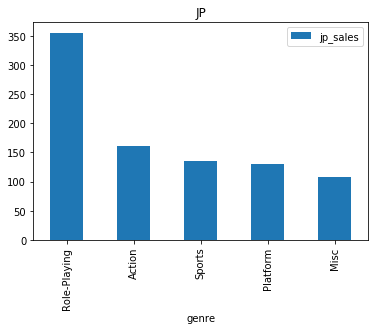

In [34]:
games.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', title='NA')
games.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', title='EU')
games.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', title='JP')



Распределение жанров по популярности практически идентично в Сев.Америке и Европе. Наиболее популярный жанр - Action, Misc - не популярный. В Японии самый популярный жанр Role-Playing (возможно потому, что в них всегда присутствует сильный упор на сюжет и харизматичных персонажей, что особенно ценится геймерами в Японии).

Проанализируем, влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [35]:
games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [36]:
games.fillna('NaN').groupby(by=['rating']).agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)

,na_sales
rating,
E,1292.99
NaN,1242.46
T,759.75
M,748.48
E10+,353.32
K-A,2.56
EC,1.53
AO,1.26
RP,0.00


In [37]:
games.fillna('NaN').groupby('rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)

,eu_sales
rating,
E,710.25
NaN,613.83
M,483.97
T,427.03
E10+,188.52
AO,0.61
K-A,0.27
EC,0.11
RP,0.08


In [38]:
games.fillna('NaN').groupby('rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)

,jp_sales
rating,
NaN,841.96
E,198.11
T,151.40
M,64.24
E10+,40.20
K-A,1.46
AO,0.00
EC,0.00
RP,0.00


В Сев.Америке и Европе лидируют по продажам платформы с рейтингом E, далее следуют игры без рейтинга. В Японии - игры без рейтинга на 1-м месте по продажам. Самые низкие продажи у платформ с рейтингом RP (в Сев.Америке и в Японии продажи нулевые).

# Шаг 5. Проверка гипотез

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

Гипотезы:  
•H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый  
•H1: средний пользовательский рейтинг платформ Xbox One и PC различается


In [39]:
alpha = 0.05

In [40]:
xbox = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']


In [41]:
results = st.ttest_ind(xbox, pc)

In [42]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


In [43]:
xbox = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score'].mean()
pc = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score'].mean()
print(xbox)
print(pc)


6.52142857142857
7.062467532467546


Если мы просто посчитаем средний рейтинг у этих 2-х платформ, значения разнятся.

Проверим гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Гипотезы:  
•H0: средние пользовательские рейтинги жанров Action и Sports одинаковые.  
•H1: средние пользовательские рейтинги жанров Action и Sports разные.

In [44]:
action = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sports = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']

In [45]:
action_var = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score'].var()
sports_var = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score'].var()
print(action_var)
print(sports_var)

2.031746898033191
2.5965147189730073


Нашли дисперсии данных выборок. Они отличаются. Учтем это в проверке гипотез. 

In [46]:
results = st.ttest_ind(action, sports, equal_var = False)

In [47]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


# Общий вывод

Мы провели анализ игровой индустрии. Попытались выяснить определяющие успешность игры закономерности.   
При подготовке данных мы привели к нижнему регистру названия столбцов. Изменили тип данных показателя Оценка пользователей на Int, предварительно заполнив пропуски в данных на -1. Проверили данные на дубликаты. Посчитали суммарные продажи во всех регионах.   

Далее мы провели исследовательский анализ данных. Обнаружили, что максимальное кол-во игр выпускалось в период с 2008 по 2010 гг., минимальные кол-ва игр выпускались в период с 1980 по 1990 гг. Определили, что в среднем каждая платформа продавалась около 10 лет. На конец 2016 г по кол-ву продаж лидируют модели: PS3, "X360", Wii. Причем их продажи также падают.   

Посмотрели глобальные продажи игр в разбивке по платформам. Медиана по топовым платформам находится в диапазоне от 0,2 до 0,25 млн продаж за игру. Верхняя граница предела, за которыми определяются аномалии, у двух платформ: PS3 и "X360" на уровне 1,7 млн.  

Посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. С ростом рейтинга пользователей увеличиваются продажи игр. Однако есть выбросы, то есть случаи, когда рейтинги пользователей невысокие, а продажи высокие. Также прослеживается прямая зависимость между рейтингом критиков и ростом продаж.  
Посчитали корреляцию между отзывами и продажами. Сильнее на конечные продажи влияют оценки критиков (корреляция 0,43). Влияние оценок пользователей на продажи меньше (корреляция 0,27).  

Посмотрели на общее распределение игр по жанрам. Максимальные продажи игр жанра Action. Минимальные продажи жанра Strategy.  

Составили портрет пользователей каждого региона.  
Определили, что популярность платформ абсолютно разная в зависимости от региона.  
Распределение жанров по популярности практически идентично в Сев.Америке и Европе. Наиболее популярный жанр - Action, Misc - не популярный. В Японии самый популярный жанр Role-Playing.  
Во всех регионах лидируют по продажам платформы с рейтингом E, следующие по популярности платформы с рейтингами T и M. Самые низкие продажи у платформ с рейтингом RP (в некоторых регионах продажи нулевые).  

Проверили гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Она не подтвердилась.  
Проверили гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Она подтвердилась.
